In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris


In [6]:
def euclidean(a, b):
    return np.linalg.norm(a-b)

In [7]:
def init_grid(rows, cols):
    return np.random.randn(rows, cols)


In [8]:
dataset = load_iris().data


In [9]:
def find_bmu(x, grid):
    bmu = (0, 0)
    d = float("-inf")
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if d < euclidean(x, grid[i,j]):
                d = euclidean(x, grid[i, j])
                bmu = (i, j)
    return bmu

In [10]:
def update_grid(x, grid, lr, sigma, bmu):
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            bmu_dist = np.sqrt((i-bmu[0]) **2 + (j-bmu[1])**2)
            h = np.exp(-(bmu_dist) ** 2)  / (2*sigma**2)
            grid[i, j] += lr * h * (x - grid[i, j])
              
    return grid

In [11]:
def train_som(dataset, grid, lr0, sigma0):
    if sigma0 == None:
        sigma0 = max(grid.shape[0], grid.shape[1]) // 2
    for epoch in range(1000):
        lr = lr0 * (1-epoch)//1000
        sigma = sigma0 * (1-epoch) // 1000
        for x in dataset:
            bmu = find_bmu(x, grid)
            grid = update_grid(x, grid, lr, sigma, bmu)

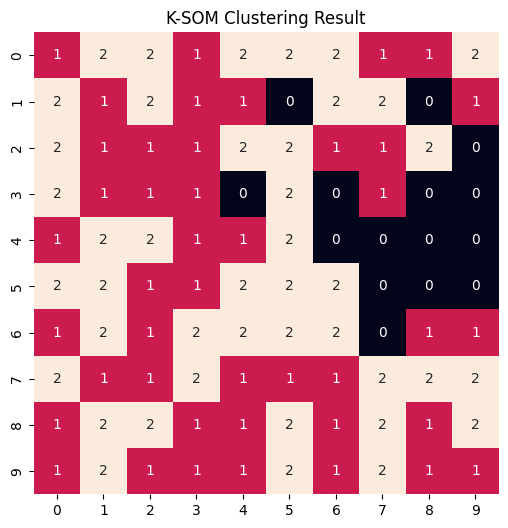

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
def euclidean(a, b):
    return np.linalg.norm(a-b)
def init_grid(rows, cols):
    return np.random.randn(rows, cols, dataset.shape[1])
dataset = load_iris().data

def find_bmu(x, grid):
    bmu = (0, 0)
    d = float("-inf")
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if d < euclidean(x, grid[i,j]):
                d = euclidean(x, grid[i, j])
                bmu = (i, j)
    return bmu

def update_grid(x, grid, lr, sigma, bmu):
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            bmu_dist = np.sqrt((i-bmu[0]) **2 + (j-bmu[1])**2)
            h = np.exp((-(bmu_dist ** 2))  / (2*sigma**2))
            grid[i, j] += lr * h * (x - grid[i, j])
              
    return grid
def train_som(dataset, grid, lr0, sigma0):
    if sigma0 == None:
        sigma0 = max(grid.shape[0], grid.shape[1]) // 2
    for epoch in range(10):
        lr = lr0 * (1-epoch)/1000
        sigma = max(sigma0 * (1 - epoch / 10), 1e-4)  
        for x in dataset:
            bmu = find_bmu(x, grid)
            grid = update_grid(x, grid, lr, sigma, bmu)
    return grid


from sklearn.cluster import KMeans
import seaborn as sns
def ksom_clustering(grid, k):
    flat_grid = grid.reshape(-1, grid.shape[2])
    kmeans = KMeans(n_clusters=k, random_state=42).fit(flat_grid)
    cluster_labels = kmeans.labels_.reshape(grid.shape[0], grid.shape[1])
    return cluster_labels

# -------- Plot Clustered SOM Grid --------
def plot_clustered_heatmap(cluster_labels):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cluster_labels, annot=True, cbar=False)
    plt.title("K-SOM Clustering Result")
    plt.show()

data = dataset
rows, cols = 10, 10  # SOM grid dimensions
grid = init_grid(rows, cols)
grid = train_som(data, grid, lr0 = 0.1, sigma0 = None)

# Apply K-SOM clustering
k = 3  # Number of clusters
cluster_labels = ksom_clustering(grid, k)
plot_clustered_heatmap(cluster_labels)
